# Introduction
For this assignment we were given 79 variables, each one of those represent a question that people responded to through a survey. <br><br> The objective is to run two Unsupervised algorithms in order to find insights towards this main question: 
- Which personality traits drive people to buy a **Mac** vs a **Windows**. <br>

We implemented two main algorithms **PCA**, and **Clusters**. The former is minimizing orthogonal distances by reducing the dimensional space. <br>
The latter, is grouping observations according to some similar features that they possess.


# Data Exploration
We started by massaging the Personal Information for later use, checking the survey for false answers *(people who have 'just filled something in')* and lastly divided the data into **Big 5 personality** questions and **Hult DNA** questions. 

In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering


########################################
# loading data and setting display options
########################################
# loading data
survey = pd.read_excel('./survey_data.xlsx')

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

## UDFs

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)

    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/survey_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()
    
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []
    
    # For loop 
    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)

        # FITTING to the data
        model.fit(data)

        # append each inertia to the list of inertias
        inertias.append(model.inertia_)

    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')

    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

## Massaging Personal info

In [3]:
# Renaming nationalities 
nationality = {'China': 'Chinese',
                'chinese': 'Chinese',
                'china': 'Chinese',
                'CHINA': 'Chinese',
                'indian': 'Indian',
                'INDIAN': 'Indian',
                'indian.': 'Indian',
                'nigerian': 'Nigerian',
                'Nigeria': 'Nigerian',
                'mexican': 'Mexican',
                'italian': 'Italian',
                'Germany': 'German',
                'Brazil': 'Brazilian',
                'USA': 'American',
                'Italian and Spanish': 'Italian',
                'British, Indian': 'British',
                'German/American': 'German',
                'ecuador': 'Ecuadorian',
                'Ecuador': 'Ecuadorian',
                'canadian': 'Canadian',
                'Canada': 'Canadian',
                'Spain': 'Spanish',
                'Peru': 'Peruvian',
                'Colombia': 'Colombian',
                'colombian': 'Colombian',
                'South Korea': 'Korean',
                'Korea': 'Korean',
                'Republic of Korea': 'Korean',
                'Czech Republic': 'Czech',
                'Indonesia': 'Indonesian',
                'Taiwan': 'Taiwanese',
                'Russia': 'Russian',
                'Japan': 'Japanese',
                'Congolese (DR CONGO)': 'Congolese'}

# Replacing nationalities in column
survey.iloc[:,77].replace(nationality, inplace = True)

In [4]:
# Changing Chromebook to Windows
survey.iloc[:,73] = survey.iloc[:,73].replace('Chromebook', 'Windows laptop')

In [5]:
# Creating empty list for storing age groups
age_group = []

# Grouping ages into age groups
for age in survey.iloc[:,75]: 
    if age < 25:
        age_group.append('18-24')
        
    elif age >= 25 and age < 31:
        age_group.append('25-30')
        
    elif age >= 31 and age < 36:
        age_group.append('31-35')
        
    else: 
        age_group.append('36+')

In [6]:
survey.iloc[:,75] = age_group

## Reversing columns that ask negative question

In [7]:
# Reverse column   
survey['R-16'] = 0
survey['R-46'] = 0
survey['R-41'] = 0
survey['R-17'] = 0
survey['R-42'] = 0
survey['R-32'] = 0
survey['R-33'] = 0
survey['R-48'] = 0
survey['R-9']  = 0
survey['R-49'] = 0
survey['R-35'] = 0
survey['R-30'] = 0 

# Reverse 16 

for index, val in survey.iterrows():
    
    if survey.iloc[index,16] == 1:
        survey.loc[index,'R-16'] = 5
    
    if survey.iloc[index,16] == 2:
        survey.loc[index,'R-16'] = 4
        
    if survey.iloc[index,16] == 3:
        survey.loc[index,'R-16'] = 3
        
    if survey.iloc[index,16] == 4:
        survey.loc[index,'R-16'] = 2
    
    if survey.iloc[index,16] == 5:
        survey.loc[index,'R-16'] = 1

# Reverse 46 

for index, val in survey.iterrows():
    
    if survey.iloc[index,46] == 1:
        survey.loc[index,'R-46'] = 5
    
    if survey.iloc[index,46] == 2:
        survey.loc[index,'R-46'] = 4
        
    if survey.iloc[index,46] == 3:
        survey.loc[index,'R-46'] = 3
        
    if survey.iloc[index,46] == 4:
        survey.loc[index,'R-46'] = 2
    
    if survey.iloc[index,46] == 5:
        survey.loc[index,'R-46'] = 1        
        
# Reverse 41 

for index, val in survey.iterrows():
    
    if survey.iloc[index,41] == 1:
        survey.loc[index,'R-41'] = 5
    
    if survey.iloc[index,41] == 2:
        survey.loc[index,'R-41'] = 4
        
    if survey.iloc[index,41] == 3:
        survey.loc[index,'R-41'] = 3
        
    if survey.iloc[index,41] == 4:
        survey.loc[index,'R-41'] = 2
    
    if survey.iloc[index,41] == 5:
        survey.loc[index,'R-41'] = 1          
        

# Reverse 17

for index, val in survey.iterrows():
    
    if survey.iloc[index,17] == 1:
        survey.loc[index,'R-17'] = 5
    
    if survey.iloc[index,17] == 2:
        survey.loc[index,'R-17'] = 4
        
    if survey.iloc[index,17] == 3:
        survey.loc[index,'R-17'] = 3
        
    if survey.iloc[index,17] == 4:
        survey.loc[index,'R-17'] = 2
    
    if survey.iloc[index,17] == 5:
        survey.loc[index,'R-17'] = 1   
        

# Reverse 42 

for index, val in survey.iterrows():
    
    if survey.iloc[index,42] == 1:
        survey.loc[index,'R-42'] = 5
    
    if survey.iloc[index,42] == 2:
        survey.loc[index,'R-42'] = 4
        
    if survey.iloc[index,42] == 3:
        survey.loc[index,'R-42'] = 3
        
    if survey.iloc[index,42] == 4:
        survey.loc[index,'R-42'] = 2
    
    if survey.iloc[index,42] == 5:
        survey.loc[index,'R-42'] = 1  
        

# Reverse 32 
for index, val in survey.iterrows():
    
    if survey.iloc[index,32] == 1:
        survey.loc[index,'R-32'] = 5
    
    if survey.iloc[index,32] == 2:
        survey.loc[index,'R-32'] = 4
        
    if survey.iloc[index,32] == 3:
        survey.loc[index,'R-32'] = 3
        
    if survey.iloc[index,32] == 4:
        survey.loc[index,'R-32'] = 2
    
    if survey.iloc[index,32] == 5:
        survey.loc[index,'R-32'] = 1  
        
# Reverse 33 
for index, val in survey.iterrows():
    
    if survey.iloc[index,33] == 1:
        survey.loc[index,'R-33'] = 5
    
    if survey.iloc[index,33] == 2:
        survey.loc[index,'R-33'] = 4
        
    if survey.iloc[index,33] == 3:
        survey.loc[index,'R-33'] = 3
        
    if survey.iloc[index,33] == 4:
        survey.loc[index,'R-33'] = 2
    
    if survey.iloc[index,33] == 5:
        survey.loc[index,'R-33'] = 1  
        
# Reverse 48 
for index, val in survey.iterrows():
    
    if survey.iloc[index,48] == 1:
        survey.loc[index,'R-48'] = 5
    
    if survey.iloc[index,48] == 2:
        survey.loc[index,'R-48'] = 4
        
    if survey.iloc[index,48] == 3:
        survey.loc[index,'R-48'] = 3
        
    if survey.iloc[index,48] == 4:
        survey.loc[index,'R-48'] = 2
    
    if survey.iloc[index,48] == 5:
        survey.loc[index,'R-48'] = 1  

# Reverse 9 
for index, val in survey.iterrows():
    
    if survey.iloc[index,9] == 1:
        survey.loc[index,'R-9'] = 5
    
    if survey.iloc[index,9] == 2:
        survey.loc[index,'R-9'] = 4
        
    if survey.iloc[index,9] == 3:
        survey.loc[index,'R-9'] = 3
        
    if survey.iloc[index,9] == 4:
        survey.loc[index,'R-9'] = 2
    
    if survey.iloc[index,9] == 5:
        survey.loc[index,'R-9'] = 1  

# Reverse 49 
for index, val in survey.iterrows():
    
    if survey.iloc[index,49] == 1:
        survey.loc[index,'R-49'] = 5
    
    if survey.iloc[index,49] == 2:
        survey.loc[index,'R-49'] = 4
        
    if survey.iloc[index,49] == 3:
        survey.loc[index,'R-49'] = 3
        
    if survey.iloc[index,49] == 4:
        survey.loc[index,'R-49'] = 2
    
    if survey.iloc[index,49] == 5:
        survey.loc[index,'R-49'] = 1  
        
# Reverse 35 
for index, val in survey.iterrows():
    
    if survey.iloc[index,35] == 1:
        survey.loc[index,'R-35'] = 5
    
    if survey.iloc[index,35] == 2:
        survey.loc[index,'R-35'] = 4
        
    if survey.iloc[index,35] == 3:
        survey.loc[index,'R-35'] = 3
        
    if survey.iloc[index,35] == 4:
        survey.loc[index,'R-35'] = 2
    
    if survey.iloc[index,35] == 5:
        survey.loc[index,'R-35'] = 1       


# Reverse 30
for index, val in survey.iterrows():
    
    if survey.iloc[index,30] == 1:
        survey.loc[index,'R-30'] = 5
    
    if survey.iloc[index,30] == 2:
        survey.loc[index,'R-30'] = 4
        
    if survey.iloc[index,30] == 3:
        survey.loc[index,'R-30'] = 3
        
    if survey.iloc[index,30] == 4:
        survey.loc[index,'R-30'] = 2
    
    if survey.iloc[index,30] == 5:
        survey.loc[index,'R-30'] = 1       

In [8]:
# checking information about each column
survey['Q1-16']  = 0
survey['Q21-46'] = 0
survey['Q36-41'] = 0
survey['Q2-17']  = 0
survey['Q22-42'] = 0
survey['Q7-32']  = 0
survey['Q18-33'] = 0
survey['Q28-48'] = 0
survey['Q4-9']   = 0
survey['Q19-49'] = 0
survey['Q10-35'] = 0
survey['Q15-30'] = 0

# Creating for-loop if difference is > 1, flag row 
for index, val in survey.iterrows():
    
    if abs(survey.iloc[index,1] - survey.iloc[index,79]) > 1:
        survey.loc[index,'Q1-16'] = 1
 
    if abs(survey.iloc[index,21] - survey.iloc[index,80]) > 1:
        survey.loc[index,'Q21-46'] = 1
        
    if abs(survey.iloc[index,36] - survey.iloc[index,81]) > 1:
        survey.loc[index,'Q36-41'] = 1
    
    if abs(survey.iloc[index,2] - survey.iloc[index,82]) > 1:
        survey.loc[index,'Q2-17'] = 1
        
    if abs(survey.iloc[index,7] - survey.iloc[index,83]) > 1:
        survey.loc[index,'Q7-32'] = 1
    
    if abs(survey.iloc[index,18] - survey.iloc[index,84]) > 1:
        survey.loc[index,'Q18-33'] = 1
        
    if abs(survey.iloc[index,28] - survey.iloc[index,85]) > 1:
        survey.loc[index,'Q28-48'] = 1
        
    if abs(survey.iloc[index,4] - survey.iloc[index,86]) > 1:
        survey.loc[index,'Q4-9'] = 1
        
    if abs(survey.iloc[index,19] - survey.iloc[index,87]) > 1:
        survey.loc[index,'Q19-49'] = 1
        
    if abs(survey.iloc[index,10] - survey.iloc[index,88]) > 1:
        survey.loc[index,'Q10-35'] = 1
        
    if abs(survey.iloc[index,15] - survey.iloc[index,89]) > 1:
        survey.loc[index,'Q15-30'] = 1

In [9]:
# Create column delete to check which columns should be deleted 
survey['DELETE'] = 0

for index, vaa in survey.iterrows():
    #if statement comparing the differences. if >= 7 wrong, delete
    if survey.loc[index,'Q1-16'] + survey.loc[index,'Q21-46'] + survey.loc[index,'Q36-41'] \
        + survey.loc[index,'Q2-17'] + survey.loc[index,'Q22-42'] + survey.loc[index,'Q7-32'] + \
        survey.loc[index,'Q18-33'] + survey.loc[index,'Q28-48'] + survey.loc[index,'Q4-9'] + \
        survey.loc[index,'Q19-49'] + survey.loc[index,'Q10-35'] + survey.loc[index,'Q10-35'] \
        >= 7:
        # Rows to be deleted
        survey.loc[index,'DELETE'] = 1

In [10]:
# Creating for-loop to drop rows that filled in wrong
for index, vaa in survey.iterrows():
    if survey.loc[index,'DELETE'] == 1:
        survey.drop(index, inplace = True)

## Deleting duplicate columns

In [11]:
# Dropping duplicate columns 
survey = survey.drop(['Respond effectively to multiple priorities.1',
             'Take initiative even when circumstances, objectives, or rules aren\'t clear.1',
             'Encourage direct and open discussions.1'], axis = 1)

## Subsetting per_info from larger DF

In [12]:
# Subsetting personal info before deleting it from bigger DF
pers_info = survey.iloc[ : , 69:76]

In [13]:
# Greating new DF without pers_info
survey_new = survey.iloc[ : , 1:69]

## Standardizing rows

In [14]:
# Changing columns and rows so can use StandardScaler()
survey_new.transpose()

,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,29,30,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,56,57,58,59,60,61,62,63,65,66,67,70,71,73,75,76,78,79,80,82,83,84,85,86,87,88,89,90,92,95,97,98,99,100,101,102,103,104,105,106,107,108,109,110,112,113,114,115,116,117,118,119,120,121,122,123,124,125,127,128,129,130,133,134,135,136
Am the life of the party,4,2,4,5,3,3,3,1,3,1,5,2,3,2,3,3,3,4,3,2,2,2,3,5,1,3,1,4,2,4,2,4,2,4,4,4,3,3,2,3,5,3,4,3,4,3,3,2,3,1,3,3,4,3,3,4,3,2,5,1,3,1,3,4,2,1,3,3,3,3,3,2,3,3,4,3,4,4,3,4,3,5,4,4,4,3,4,3,3,4,5,4,4,2,3,5,1,2,4,2,4,4,1,3,2,1,2,1,1,4,3,2,4,3,2
Feel little concern for others,3,4,5,4,2,4,5,3,4,1,1,2,2,2,3,3,4,5,3,3,2,4,4,3,2,1,4,3,4,4,3,1,3,4,4,4,2,1,2,1,5,1,4,3,4,1,1,2,2,4,2,5,5,4,2,4,2,2,1,5,1,1,1,1,4,4,3,1,2,3,2,4,2,4,1,3,2,2,3,2,1,5,4,2,1,3,4,2,1,5,1,1,2,4,4,4,1,3,2,4,2,1,1,1,1,3,2,4,2,5,2,4,3,2,4
Am always prepared,4,3,3,4,2,4,4,5,5,3,3,4,4,3,3,5,4,4,3,3,5,3,4,3,2,4,5,4,3,4,3,2,4,5,3,5,4,3,4,3,3,3,3,3,2,4,5,4,5,2,4,4,4,4,5,4,4,5,4,4,3,4,4,4,3,3,2,4,4,5,4,4,4,4,3,2,3,3,2,4,2,5,5,4,4,5,3,3,4,3,3,3,4,2,4,4,4,3,3,3,4,4,3,4,2,2,3,3,2,4,3,3,3,3,3
Get stressed out easily,3,4,3,4,5,5,2,4,4,3,2,2,3,4,2,1,5,4,4,2,1,4,1,3,4,3,1,3,2,2,4,2,3,2,4,3,3,5,3,4,4,4,3,4,3,5,4,2,3,1,2,2,4,2,2,2,4,4,2,1,4,5,2,3,3,5,1,1,3,3,3,1,2,3,4,3,4,2,4,5,3,2,1,1,3,3,3,4,4,2,4,3,4,2,1,2,2,2,3,1,3,3,5,1,2,3,3,2,2,2,3,2,2,3,3
Have a rich vocabulary,4,3,3,3,2,3,4,2,4,3,5,3,2,4,3,3,3,3,3,3,4,1,4,2,4,3,1,4,2,4,2,5,4,4,3,2,4,4,4,3,3,3,2,4,2,4,5,5,4,3,3,4,3,4,2,3,4,3,4,5,2,4,4,2,2,4,3,4,4,4,4,4,3,3,4,1,5,2,3,4,2,4,4,3,5,1,4,3,3,4,3,4,3,1,3,4,5,4,4,3,4,4,4,3,3,3,3,4,4,3,3,1,4,3,3
Don't talk a lot,2,3,3,3,2,4,1,3,4,2,4,1,5,4,3,3,2,2,4,4,4,3,2,3,2,2,3,2,3,3,3,2,4,2,2,1,1,2,2,2,2,5,5,3,3,4,4,4,3,2,2,4,3,3,3,4,2,4,3,3,4,4,2,2,2,4,2,2,4,2,2,1,1,3,2,4,3,2,2,1,4,3,2,4,3,4,3,3,3,2,1,2,3,4,3,3,3,4,1,5,2,1,3,4,2,5,4,5,3,3,2,3,3,2,2
Am interested in people,3,2,5,3,4,4,4,3,3,4,4,5,4,4,3,3,3,4,3,3,4,3,4,4,2,4,4,4,3,3,4,4,3,5,3,5,5,4,3,5,4,4,4,2,5,5,5,4,3,5,4,5,3,5,2,2,4,4,2,4,4,4,5,4,4,3,4,4,4,4,4,1,4,5,4,5,3,3,4,5,4,4,4,3,4,2,4,4,5,5,5,5,5,3,4,4,4,4,4,4,5,5,5,5,4,2,4,4,3,5,1,2,2,5,4
Leave my belongings around,2,3,3,3,2,3,1,1,1,2,5,4,5,2,2,3,4,3,3,1,3,3,2,1,1,1,5,3,3,2,3,3,3,4,3,3,1,1,2,1,4,3,2,2,3,4,4,1,1,4,1,1,2,3,1,2,1,2,1,1,4,1,5,1,4,1,1,3,1,1,2,1,2,5,2,3,3,4,3,5,2,3,1,1,3,5,3,2,2,3,1,2,3,2,2,2,1,5,1,5,4,1,1,1,1,1,4,2,4,5,1,1,4,1,3
Am relaxed most of the time,3,4,5,3,3,2,3,4,2,2,4,4,5,3,3,4,3,3,4,3,4,2,2,2,2,3,1,2,2,4,2,4,4,4,5,2,3,2,4,2,4,3,3,3,4,2,2,4,4,5,4,4,1,2,5,4,3,2,2,4,4,3,4,1,4,1,4,5,4,3,4,5,2,5,2,2,2,1,3,3,3,4,3,5,3,4,4,3,2,4,4,4,2,4,4,5,4,4,3,4,4,4,2,4,2,3,4,4,3,5,2,4,2,3,3
Have difficulty understanding abstract ideas,2,2,4,3,2,1,1,3,1,3,2,2,1,3,2,3,2,4,2,2,4,2,2,3,1,3,1,3,2,2,2,2,1,2,3,4,3,3,1,2,1,3,4,2,3,4,2,1,3,3,3,2,3,5,1,3,4,2,1,1,2,2,1,3,2,5,2,2,1,1,4,2,1,3,1,4,2,1,3,2,1,3,3,2,2,1,3,2,3,1,3,1,3,4,3,2,1,2,2,1,2,2,4,2,4,3,3,1,1,4,3,3,2,3,3


In [15]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(survey_new)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(survey_new)

# converting scaled data into a DataFrame
survey_scaled = pd.DataFrame(X_scaled)

# reattaching column names
survey_scaled.columns = survey_new.columns

# checking pre- and post-scaling variance
# print(pd.np.var(survey_new), '\n\n')
# print(pd.np.var(survey_scaled))

In [16]:
# Changing back columns and rows
survey_new.transpose()

,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,29,30,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,56,57,58,59,60,61,62,63,65,66,67,70,71,73,75,76,78,79,80,82,83,84,85,86,87,88,89,90,92,95,97,98,99,100,101,102,103,104,105,106,107,108,109,110,112,113,114,115,116,117,118,119,120,121,122,123,124,125,127,128,129,130,133,134,135,136
Am the life of the party,4,2,4,5,3,3,3,1,3,1,5,2,3,2,3,3,3,4,3,2,2,2,3,5,1,3,1,4,2,4,2,4,2,4,4,4,3,3,2,3,5,3,4,3,4,3,3,2,3,1,3,3,4,3,3,4,3,2,5,1,3,1,3,4,2,1,3,3,3,3,3,2,3,3,4,3,4,4,3,4,3,5,4,4,4,3,4,3,3,4,5,4,4,2,3,5,1,2,4,2,4,4,1,3,2,1,2,1,1,4,3,2,4,3,2
Feel little concern for others,3,4,5,4,2,4,5,3,4,1,1,2,2,2,3,3,4,5,3,3,2,4,4,3,2,1,4,3,4,4,3,1,3,4,4,4,2,1,2,1,5,1,4,3,4,1,1,2,2,4,2,5,5,4,2,4,2,2,1,5,1,1,1,1,4,4,3,1,2,3,2,4,2,4,1,3,2,2,3,2,1,5,4,2,1,3,4,2,1,5,1,1,2,4,4,4,1,3,2,4,2,1,1,1,1,3,2,4,2,5,2,4,3,2,4
Am always prepared,4,3,3,4,2,4,4,5,5,3,3,4,4,3,3,5,4,4,3,3,5,3,4,3,2,4,5,4,3,4,3,2,4,5,3,5,4,3,4,3,3,3,3,3,2,4,5,4,5,2,4,4,4,4,5,4,4,5,4,4,3,4,4,4,3,3,2,4,4,5,4,4,4,4,3,2,3,3,2,4,2,5,5,4,4,5,3,3,4,3,3,3,4,2,4,4,4,3,3,3,4,4,3,4,2,2,3,3,2,4,3,3,3,3,3
Get stressed out easily,3,4,3,4,5,5,2,4,4,3,2,2,3,4,2,1,5,4,4,2,1,4,1,3,4,3,1,3,2,2,4,2,3,2,4,3,3,5,3,4,4,4,3,4,3,5,4,2,3,1,2,2,4,2,2,2,4,4,2,1,4,5,2,3,3,5,1,1,3,3,3,1,2,3,4,3,4,2,4,5,3,2,1,1,3,3,3,4,4,2,4,3,4,2,1,2,2,2,3,1,3,3,5,1,2,3,3,2,2,2,3,2,2,3,3
Have a rich vocabulary,4,3,3,3,2,3,4,2,4,3,5,3,2,4,3,3,3,3,3,3,4,1,4,2,4,3,1,4,2,4,2,5,4,4,3,2,4,4,4,3,3,3,2,4,2,4,5,5,4,3,3,4,3,4,2,3,4,3,4,5,2,4,4,2,2,4,3,4,4,4,4,4,3,3,4,1,5,2,3,4,2,4,4,3,5,1,4,3,3,4,3,4,3,1,3,4,5,4,4,3,4,4,4,3,3,3,3,4,4,3,3,1,4,3,3
Don't talk a lot,2,3,3,3,2,4,1,3,4,2,4,1,5,4,3,3,2,2,4,4,4,3,2,3,2,2,3,2,3,3,3,2,4,2,2,1,1,2,2,2,2,5,5,3,3,4,4,4,3,2,2,4,3,3,3,4,2,4,3,3,4,4,2,2,2,4,2,2,4,2,2,1,1,3,2,4,3,2,2,1,4,3,2,4,3,4,3,3,3,2,1,2,3,4,3,3,3,4,1,5,2,1,3,4,2,5,4,5,3,3,2,3,3,2,2
Am interested in people,3,2,5,3,4,4,4,3,3,4,4,5,4,4,3,3,3,4,3,3,4,3,4,4,2,4,4,4,3,3,4,4,3,5,3,5,5,4,3,5,4,4,4,2,5,5,5,4,3,5,4,5,3,5,2,2,4,4,2,4,4,4,5,4,4,3,4,4,4,4,4,1,4,5,4,5,3,3,4,5,4,4,4,3,4,2,4,4,5,5,5,5,5,3,4,4,4,4,4,4,5,5,5,5,4,2,4,4,3,5,1,2,2,5,4
Leave my belongings around,2,3,3,3,2,3,1,1,1,2,5,4,5,2,2,3,4,3,3,1,3,3,2,1,1,1,5,3,3,2,3,3,3,4,3,3,1,1,2,1,4,3,2,2,3,4,4,1,1,4,1,1,2,3,1,2,1,2,1,1,4,1,5,1,4,1,1,3,1,1,2,1,2,5,2,3,3,4,3,5,2,3,1,1,3,5,3,2,2,3,1,2,3,2,2,2,1,5,1,5,4,1,1,1,1,1,4,2,4,5,1,1,4,1,3
Am relaxed most of the time,3,4,5,3,3,2,3,4,2,2,4,4,5,3,3,4,3,3,4,3,4,2,2,2,2,3,1,2,2,4,2,4,4,4,5,2,3,2,4,2,4,3,3,3,4,2,2,4,4,5,4,4,1,2,5,4,3,2,2,4,4,3,4,1,4,1,4,5,4,3,4,5,2,5,2,2,2,1,3,3,3,4,3,5,3,4,4,3,2,4,4,4,2,4,4,5,4,4,3,4,4,4,2,4,2,3,4,4,3,5,2,4,2,3,3
Have difficulty understanding abstract ideas,2,2,4,3,2,1,1,3,1,3,2,2,1,3,2,3,2,4,2,2,4,2,2,3,1,3,1,3,2,2,2,2,1,2,3,4,3,3,1,2,1,3,4,2,3,4,2,1,3,3,3,2,3,5,1,3,4,2,1,1,2,2,1,3,2,5,2,2,1,1,4,2,1,3,1,4,2,1,3,2,1,3,3,2,2,1,3,2,3,1,3,1,3,4,3,2,1,2,2,1,2,2,4,2,4,3,3,1,1,4,3,3,2,3,3


In [17]:
survey_new.head()

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results
0,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4
1,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,2,4,4,2,3,4,5,5,4,5
3,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,5,3,5,5,5,5,3,5,5,5,5
4,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,4,4,3,3,4,4,3,3,3,3,3
5,3,2,2,5,2,2,4,2,3,2,2,2,4,5,3,4,4,4,2,3,2,2,2,4,3,4,4,3,3,2,2,2,3,4,4,4,4,3,3,3,3,4,2,4,4,4,3,3,4,3,4,2,3,4,4,3,3,4,4,3,4,3,2,3,3,5,3,4


## Subsetting DF into big_five and hult_dna

In [18]:
# Subsetting Big 5 questions
big_five = survey_new.iloc[ : , 0:50]

# Subsetting Hult DNA
hult_dna = survey_new.iloc[ : , 50:71]

# PCA
## Big 5
There is a common believe among psychologists that there are five commonly used traits to describe the personality of a person, which defines their characteristics. It is also to be noted that these traits have two extremes a person can reach and how they would react accordingly. <br><br>
*“The five broad personality traits described by the theory are extraversion (also often spelled extroversion), agreeableness, openness, conscientiousness, <br>and neuroticism. Most people lie somewhere in between the two polar ends of each dimension.”* (Cherry, 2020)

|                          |  High score              |  Low Score
:------------------------- | :---------------------:  | :---------------------------:
**Conscientiousness**      | disciplined, careful     | impulsive, disorganized
**Agreeableness**          | trusting, helpful        | suspicious, uncooperative
**Neuroticism**            | anxious, pessimistic     | calm, confident
**Openness to Experience** | imaginative, spontaneous | prefers routine, practical
**Extraversion**           | sociable, fun-loving     | reserved, thoughtful

                                (Lim, 2020)





### Group through formula
We have grouped the questions into the above mentioned categories, following the official formula. After scaling the data, so all data has the same range, which will work best for the algorithm. Then we have performed the PCA after which we have concluded our personas. We have done this for both our<br> **Big 5** as well as our **Hult DNA** data.  

In [19]:
# Creating new DF: personality
personality = pd.DataFrame()

#Extroversion
personality['Extroversion'] = 20 + big_five.iloc[:,0] - big_five.iloc[:,5]\
+ big_five.iloc[:,10] - big_five.iloc[:,15] + big_five.iloc[:,20]\
- big_five.iloc[:,25] + big_five.iloc[:,30] - big_five.iloc[:,35]\
+ big_five.iloc[:,40] - big_five.iloc[:,45]

#Agreeableness
personality['Agreeableness'] = 14 - big_five.iloc[:,1] + big_five.iloc[:,6]\
- big_five.iloc[:,11] + big_five.iloc[:,16] - big_five.iloc[:,21]\
+ big_five.iloc[:,26] - big_five.iloc[:,31] + big_five.iloc[:,36]\
+ big_five.iloc[:,41] + big_five.iloc[:,46]

#Conscientiousness 
personality['Conscientiousness'] = 14 + big_five.iloc[:,2]\
- big_five.iloc[:,7] + big_five.iloc[:,12] - big_five.iloc[:,17]\
+ big_five.iloc[:,22] - big_five.iloc[:,27] + big_five.iloc[:,32]\
- big_five.iloc[:,37] + big_five.iloc[:,42] + big_five.iloc[:,47]

#Neuroticism 
personality['Neuroticism']  = 38 - big_five.iloc[:,3] + big_five.iloc[:,8]\
- big_five.iloc[:,13] + big_five.iloc[:,18] - big_five.iloc[:,23]\
- big_five.iloc[:,28] - big_five.iloc[:,33] - big_five.iloc[:,38]\
- big_five.iloc[:,43] - big_five.iloc[:,48]

#Openness to Experience
personality['Openness'] = 8 + big_five.iloc[:,4] - big_five.iloc[:,9]\
+ big_five.iloc[:,14] - big_five.iloc[:,19]+ big_five.iloc[:,24]\
- big_five.iloc[:,29]+ big_five.iloc[:,34] + big_five.iloc[:,39]\
+ big_five.iloc[:,44] + big_five.iloc[:,49]         

### Scale columns

In [20]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(personality)

# TRANSFORMING our data after fit
X_scaled_b5 = scaler.transform(personality)

# converting scaled data into a DataFrame
personality_scaled = pd.DataFrame(X_scaled_b5)

# reattaching column names
personality_scaled.columns = personality.columns

### Perform PCA

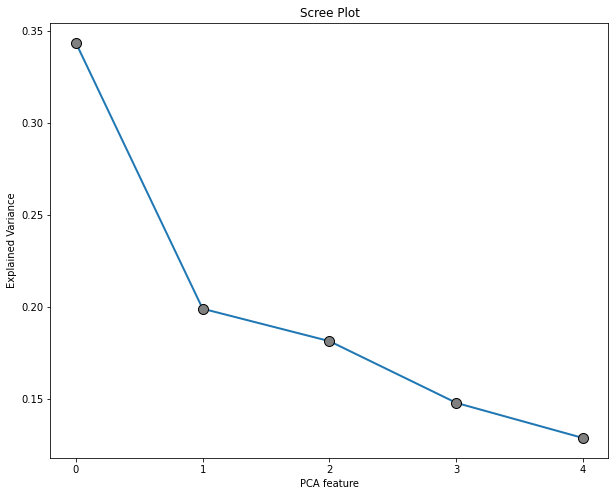

In [21]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)

# FITTING and TRANSFORMING the purchases_scaled
personality_pca = pca.fit_transform(personality_scaled)

# calling the scree_plot function
scree_plot(pca_object = pca)

In [22]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
personality_pca_3 = pca_3.fit_transform(personality_scaled)

In [23]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(personality_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(personality_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                      0     1     2     3     4
Extroversion      -0.39 -0.51 -0.59 -0.28 -0.40
Agreeableness     -0.55  0.18  0.04 -0.52  0.63
Conscientiousness -0.48  0.43  0.42 -0.09 -0.63
Neuroticism       -0.28 -0.70  0.61  0.24  0.11
Openness          -0.49  0.20 -0.33  0.76  0.17


3 Components Factor Loadings
------------------------------
                      0     1     2
Extroversion      -0.39 -0.51 -0.59
Agreeableness     -0.55  0.18  0.04
Conscientiousness -0.48  0.43  0.42
Neuroticism       -0.28 -0.70  0.61
Openness          -0.49  0.20 -0.33



<ipython-input-23-86376cec3340>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))
<ipython-input-23-86376cec3340>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


### Name the Personas
With reference to the above categorization, we as a team have identified three important components to analyze the personality that matches the above categories. The three components are:
- 0 = The Introverted Loner
- 1 = The Creative Analyst
- 2 = The Traditionalist

<b><u>The Introverted Loner</u></b><br>
The Loner is categorized by people who dislike change and structure, takes little interest in others, and is emotionally stable. According to our analysis,<br> Loners score very low on agreeableness, openness and conscientiousness and less, but also still low on extraversion and neuroticism.

<b><u>The Creative Analyst</u></b><br>
The Creative Analysts are people who love challenges, are creative, deal well with stress, and pay attention to detail. In reference to our analysis, these<br> people are strong in the traits of agreeableness, conscientiousness, openness. They are weak with the traits of extraversion and neuroticism which<br> explains their keen interest in details.

<b><u>The Traditionalist</u></b><br>
People who are an introvert, worry a lot, dislike change, and have a set schedule are categorized as The Traditionalist. As a Traditionalist, these people<br> are very strong in conscientiousness, neuroticism but are weak in extraversion, agreeableness and openness traits.

In [24]:
# naming each principal component
factor_loadings_3.columns = ['The Introverted Loner', 
                             'The Creative Analyst',                  
                             'The Traditionalist']   

### Calculating results 

In [25]:
# analyzing factor strengths per customer
X_pca_b5_reduced = pca_3.transform(personality_scaled)

# converting to a DataFrame
X_pca_b5 = pd.DataFrame(X_pca_b5_reduced)

# renaming columns
X_pca_b5.columns = factor_loadings_3.columns

## Hult DNA
The Hult DNA is a set of skills that all those in business but especially Hult students around the world should aspire to emulate while traversing their careers. The DNA is made up of **9 skills** that fall into three main groups, **Thinking**, **Communicating**, and **Team Building**. *(Hult IBS, 2018)*

The Scree graph compared with variance ratio of the components helped us make the decision to go with 4 components even though it doesn’t equal 80% of the values. The variance between the components is so small we felt that the first 4 were best to perform the PCA on.

### Scale columns

In [26]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(hult_dna)

# TRANSFORMING our data after fit
X_scaled_dna = scaler.transform(hult_dna)

# converting scaled data into a DataFrame
dna_scaled = pd.DataFrame(X_scaled_dna)

# reattaching column names
dna_scaled.columns = hult_dna.columns

### Perform PCA

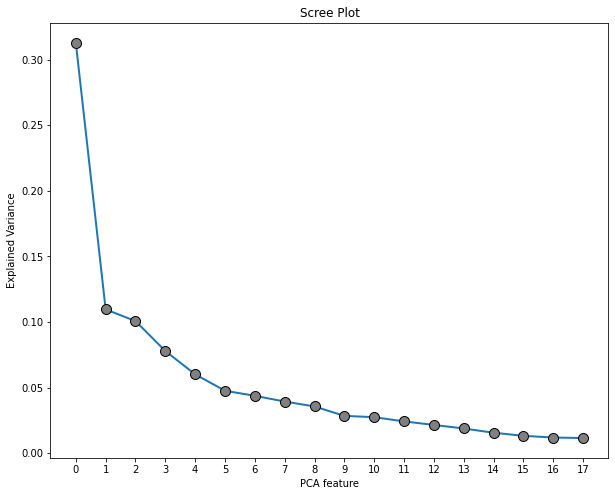

In [27]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 219)

# FITTING and TRANSFORMING the scaled data
hult_dna_pca = pca.fit_transform(hult_dna)

# Calling the scree_plot function
scree_plot(pca_object = pca)

In [28]:
# INSTANTIATING a new model using the first three principal components
pca_4 = PCA(n_components = 4,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
hult_dna_pca_4 = pca_4.fit_transform(hult_dna)

In [29]:
# transposing pca components
factor_loadings_dna = pd.DataFrame(pd.np.transpose(pca.components_))

# naming rows as original features
factor_loadings_dna = factor_loadings_dna.set_index(hult_dna.columns)

# checking the result
factor_loadings_dna.round(3)

####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca.components_))

# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(dna_scaled.columns)

##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_dna = pd.DataFrame(pd.np.transpose(pca_4.components_))

# naming rows as original features
factor_loadings_dna = factor_loadings_dna.set_index(dna_scaled.columns)


# checking the results
print(f"""
4 Components Factor Loadings
------------------------------
{factor_loadings_dna.round(2)}
""")


4 Components Factor Loadings
------------------------------
                                                                               0     1     2     3
See underlying patterns in complex situations                              -0.25 -0.11 -0.07  0.04
Don't  generate ideas that are new and different                            0.13  0.55  0.65 -0.33
Demonstrate an awareness of personal strengths and limitations             -0.24  0.17  0.04 -0.01
Display a growth mindset                                                   -0.25  0.02 -0.11 -0.07
Respond effectively to multiple priorities                                 -0.29  0.13  0.06 -0.10
Take initiative even when circumstances, objectives, or rules aren't clear -0.32 -0.05  0.04 -0.29
Encourage direct and open discussions                                      -0.28 -0.02 -0.02 -0.26
Listen carefully to others                                                 -0.16  0.23 -0.20  0.29
Don't persuasively sell a vision or idea        

<ipython-input-29-4b044400a677>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_dna = pd.DataFrame(pd.np.transpose(pca.components_))
<ipython-input-29-4b044400a677>:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca.components_))
<ipython-input-29-4b044400a677>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_dna = pd.DataFrame(pd.np.transpose(pca_4.components_))


### Name the Personas
Looking at only the first 4(#0-3) components we looked at how strongly the potential persona's answered the Hult DNA questions. From here we could construct a narrative around who this persona is. 
- *0* didn't answer any of the questions very strongly, this lead us to believe that this person does not possess any of the Hult DNA characteristics and so we named this component **'The Unaware'**. 
- *1* indicated that they are not good at coming up with innovative ideas, or selling their ideas but that they do excel when it comes to prioritizing tasks and getting work done, so we named them **'The Doer not a Planner'**. 
- *2* indicated that they are not the one to be creative and come up with ideas but they know how to rally a team towards a common goal of getting the project done, we called this persona **'The Logical Leader'**.
- *3* Didn’t affiliate strongly with any principle other than being able to rally a team towards the common goal of getting the project done so we called this persona the **'The Team Cheerleader'**. 

In [30]:
# naming each principal component
factor_loadings_dna.columns = ['The Unaware',  #Not strong in any area of the growth mindset 
                              'The Doer not a Planner', #Can't gen or sell ideas, can't rally team, can get work done
                              'The Logical Leader', #Can rally team, Can't generate ideas 
                              'The Team Cheerleader']  #Can rally team, weak everything else 

### Calculating results

In [31]:
# analyzing factor strengths per customer
X_pca_reduced_2 = pca_4.transform(hult_dna)

# converting to a DataFrame
X_pca_dna = pd.DataFrame(X_pca_reduced_2)

# renaming columns
X_pca_dna.columns = factor_loadings_dna.columns

## Clustering
Now that we have our **7 Personas**, we can have a look how to segment them and what their demographic traits are, so that we exactly know who to target. <br><br>For this we rescaled the data again, to have everything back with the same ranges and then clustered our Personas into **clusters** (groups). Within those clusters we could see whether our Personas were present or not *(see segmentation)*. We then added back the personal info data, which we can use to target.  

### Combining Big 5 & Hult DNA

In [32]:
# Storing big_5 pca with hult_dna pca in results
results = [X_pca_b5, X_pca_dna]

# Merging results in survey_fin
survey_fin = pd.concat(results, axis = 1)

### Rescale data

In [33]:
# checking variance amongst clusters
np.var(survey_fin)

The Introverted Loner     1.718559
The Creative Analyst      0.994497
The Traditionalist        0.906195
The Unaware               3.720392
The Doer not a Planner    1.302680
The Logical Leader        1.197401
The Team Cheerleader      0.925934
dtype: float64

In [34]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(survey_fin)

# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(survey_fin)

# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)

# reattaching column names
pca_scaled.columns = ['The Introverted Loner', 
                      'The Creative Analyst', 
                      'The Traditionalist',
                      'The Unaware',
                      'The Doer not a Planner',
                      'The Logical Leader',
                      'The Team Cheerleader'] 

# checking pre- and post-scaling variance
#print(pd.np.var(survey_fin), '\n\n')
#print(pd.np.var(pca_scaled))

### Cluster data

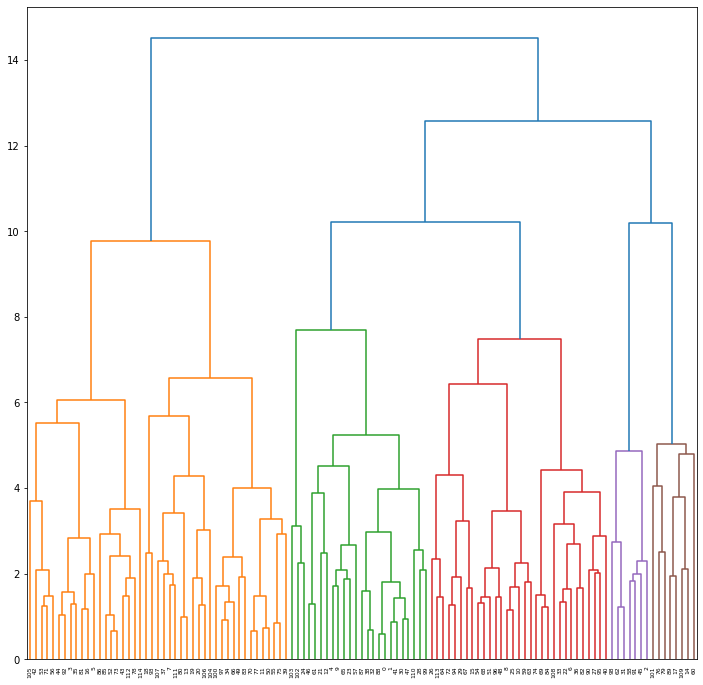

In [35]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)

# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

# saving and displaying the plot
#plt.savefig('./analysis_images/standard_hierarchical_clust_3_ward.png')
plt.show()

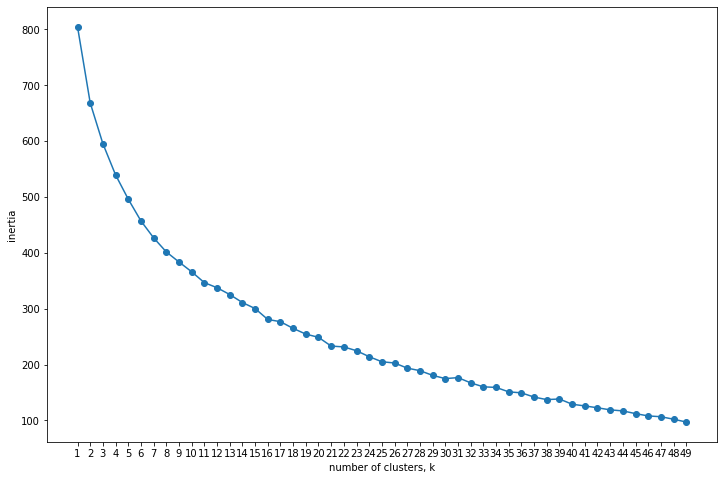

In [36]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

In [37]:
# INSTANTIATING a k-Means object with clusters
personality_k_pca = KMeans(n_clusters   = 5,
                         random_state = 219)

# fitting the object to the data
personality_k_pca.fit(pca_scaled)  

# converting the clusters to a DataFrame
personality_kmeans_pca = pd.DataFrame({'Cluster': personality_k_pca.labels_})

# checking the results
print(personality_kmeans_pca.iloc[: , 0].value_counts())

2    34
0    28
1    19
3    18
4    16
Name: Cluster, dtype: int64


### Create segmentation

In [38]:
# storing cluster centers
centroids_pca = personality_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

# renaming principal components
centroids_pca_df.columns = ['The Introverted Loner', 
                              'The Creative Analyst', 
                              'The Traditionalist',
                              'The Unaware',
                              'The Doer not a Planner',
                              'The Logical Leader',
                              'The Team Cheerleader']   

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,The Introverted Loner,The Creative Analyst,The Traditionalist,The Unaware,The Doer not a Planner,The Logical Leader,The Team Cheerleader
0,0.07,1.04,0.12,-0.25,-0.06,-0.40,0.68
1,-0.63,-0.71,-0.27,-0.35,0.29,-1.18,-0.61
2,0.90,-0.12,-0.34,0.95,0.10,0.30,-0.48
3,-1.25,-0.17,-0.02,-0.89,-1.19,0.31,0.12
4,0.10,-0.53,0.85,-0.15,0.90,1.12,0.42


In [39]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([personality_kmeans_pca,
                         survey_fin],
                         axis = 1)

### Add back Personal info questions

In [40]:
# Make sure indexes line up with clst_pca_df (reset)
pers_info = pers_info.reset_index(drop=True)

In [41]:
# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([pers_info,
                                clst_pca_df],
                                axis = 1)

In [42]:
# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}

final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

### Segmentation boxplots 

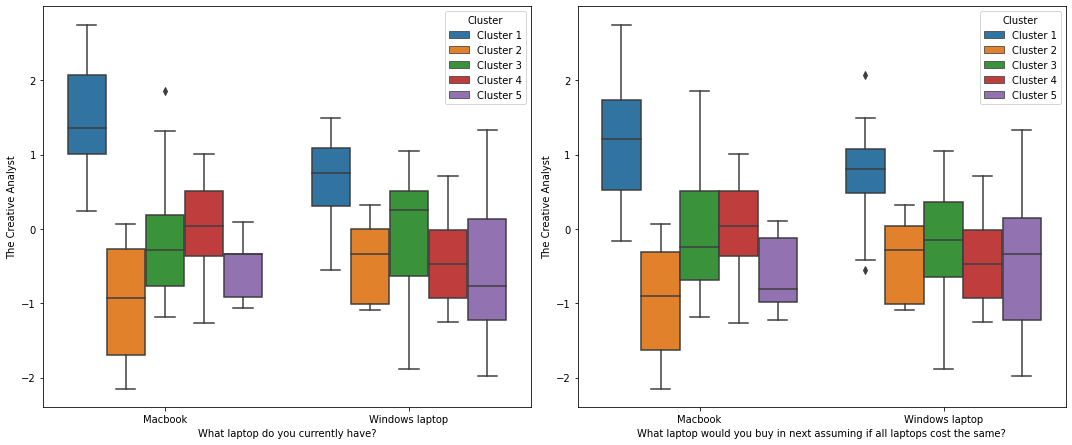

In [43]:
########################
# Current Laptop
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 12))

# The Creative Analyst
plt.subplot(2, 2, 1)
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'The Creative Analyst',
            hue = 'Cluster',
            data = final_pca_clust_df)

########################
# Ideal Laptop
########################

# The Creative Analyst
plt.subplot(2, 2, 2)
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'The Creative Analyst',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<b><u>The Creative Analyst</u></b><br>
From our analysis we could gather that *‘The Creative Analyst’* has a high score in Cluster 1 (blue, 1.04) whereas the other clusters only range between -0.12 and -0.71 for their respective *'Analyst'* score. From the boxplot it was then seen that MacBook is preferred over Windows laptops. The same trend can be seen in the type of laptop, that ‘Analysts’ want to get a MacBook over Windows laptop next.

<b><u>Recommendation</u></b><br>
In terms of demographics **female** users appear to have a higher *'Analyst'* score than male, and the most popular age group are the **18–24-year-old** ones. The Hult program with the highest score was the **MSBA DD** and regarding ethnicity **White-Caucasian** showed the highest Analyst score.<br><br> *Therefore Apple should further target this customer segment to fully benefit from this advantage.*

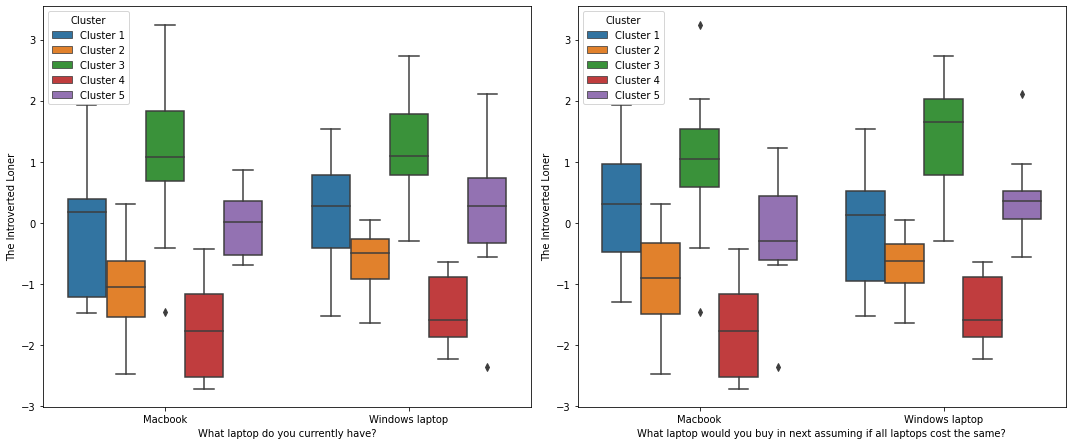

In [44]:
########################
# Current Laptop
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 12))

# The Introverted Loner
plt.subplot(2, 2, 1)
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'The Introverted Loner',
            hue = 'Cluster',
            data = final_pca_clust_df)

########################
# Ideal Laptop
########################

# The Introverted Loner
plt.subplot(2, 2, 2)
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'The Introverted Loner',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<b><u>The Introverted Loner</u></b><br>
We know that Cluster 1 (blue) has a strong affiliation (1.03) with *‘The Introverted Loner’* persona and Cluster 2 has a strong negative affinity (-0.94). Cluster 1 has more slightly **current users of Mac** computers but shows that more of this group would like to get a **Windows next**.

<b><u>Recommendation</u></b><br>
This is an interesting outcome as you might think that those who have a Mac (and paid more for it) would stay with Mac, but they appear to want to move to Windows next. It would seem that those who currently have a Mac are dissatisfied with the experience, this could be related to *‘The Introverted Loners’* **aversion to change** (Apple makes updates quite often) and them being **less extroverted**. Apple’s branding is quite colourful, they project a creative and collaborative spirit which may be off-putting to those who’s personality is at odds with this. 

In terms of who makes up this group, they are **young(<30)** and predominantly of an **Asian nationality**. Apple is at risk of losing these customers, we recommend performing in-depth customer research with this group of customers to discover what their pain points are and how that can be alleviated. 

*Once those pain points are found, we recommend reconnecting with these customers and truly making them feel part of the brand, so they are less likely to leave.*

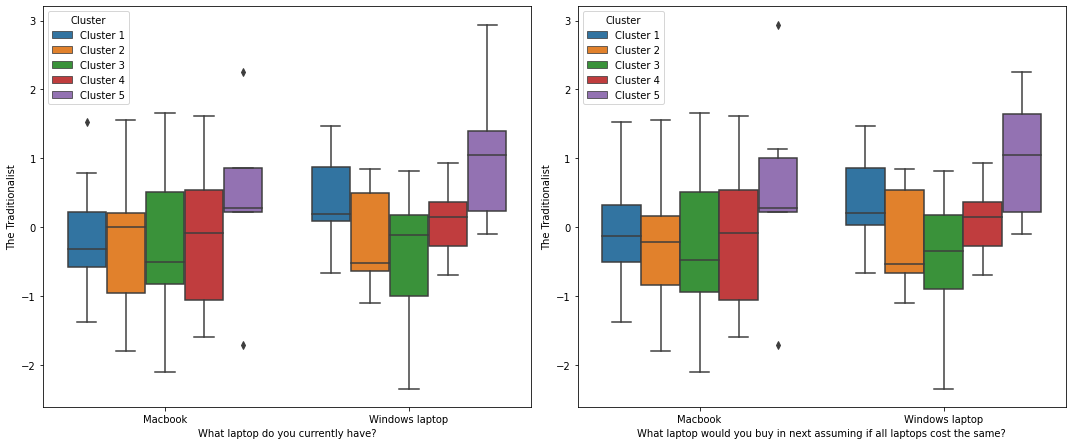

In [45]:
########################
# Current Laptop
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 12))

# The Introverted Loner
plt.subplot(2, 2, 1)
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'The Traditionalist',
            hue = 'Cluster',
            data = final_pca_clust_df)

########################
# Ideal Laptop
########################

# The Introverted Loner
plt.subplot(2, 2, 2)
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'The Traditionalist',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<b><u>The Traditionalist</u></b><br>
From the analysis we could gather that *‘The Traditionalist’* has a high score in cluster number 5 (purple, 0.85). More *‘Traditionalist’* currently have Windows than Mac, and when it comes to what they want next, most stick with the same choice. In terms of academia they are studying a type of masters that requires **high computation efficiency**. *‘The Traditionalist’* are mostly **female** and between **24-30yrs**.

<b><u>Recommendation</u></b><br>
Considering that *‘The Traditionalist’* have already established a strong connection to Windows, and they are adverse to change we don’t recommend targeting them. Our suggestion is to use marketing resources wisely based on ROI. 

*'Traditionalist' would be **too costly** to persuade towards buying a Mac.*

# Conclusion 
Through our research we have found 7 personas of which 3 have a clear preference for either Mac or Windows. <br><br>Though unsupervised machine learning can give us some very interesting insights based on the data we have, Apple will still need to do some further investigating into the underlying reasons behind the highlighted behaviours and trends. <br><br>Some segmented groups are predicted to provide less of a return on investigative effort and so pre our recommendations Apple should focus on those groups that are either more open to change or retain their relationship with faithful customers. <br><br>This will not only keep currect Mac users, but might also make people to shift allegiance from Windows to Mac.

# References 
Cherry, K. (2020, July 13). *The Big Five Personality Dimensions*. Retrieved from Verywellmind: https://www.verywellmind.com/the-big-five-personality-dimensions-2795422#:~:text=The%20five%20broad%20personality%20traits,how%20many%20personality%20traits%20exist

Hult International Business School. (2018). *Hult DNA Development Guide 2018-2019.* 

Lim, A. G. (2020, June 15). *Big Five Personality*. Retrieved from .simply psychology: https://www.simplypsychology.org/big-five-personality.html